# Esame del 27/01/2021

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
random_state = 42

In [88]:
data = pd.read_csv("exam_2021_01_27.csv",delimiter=",",names=["0","1","2","3","4"])

In [89]:
data.head()

,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [90]:
data.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [91]:
data.shape

(150, 5)

In [92]:
data.dropna(axis=0,inplace=True)

In [93]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
data["2"] = ordinal_enc.fit_transform(data["2"].values.reshape(-1,1))

In [94]:
from sklearn.model_selection import train_test_split
X = data.drop(["4"],axis = 1)
y = data["4"]
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=random_state)


In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid, cross_val_score
max_depth = 0
criterions = ["gini","entropy","log_loss"]
for criterion in criterions:
    dtc = DecisionTreeClassifier(criterion=criterion)
    y_pred = dtc.fit(X_train,y_train)
    max_depth = dtc.get_depth() if dtc.get_depth()> max_depth else max_depth
scores = []
grid = ParameterGrid ({"criterion":criterions,"max_depth":range(1,max_depth+1)})
for i in grid:
    estimator = DecisionTreeClassifier(criterion = i.get("criterion"),max_depth=i.get("max_depth"),random_state=random_state)
    scores.append(np.mean(cross_val_score(estimator,X_train,y_train,scoring = "accuracy",cv = 5)))
best_parameters = list(grid)[np.argmax(scores)]

The accuracy on the test set is  94.59 %


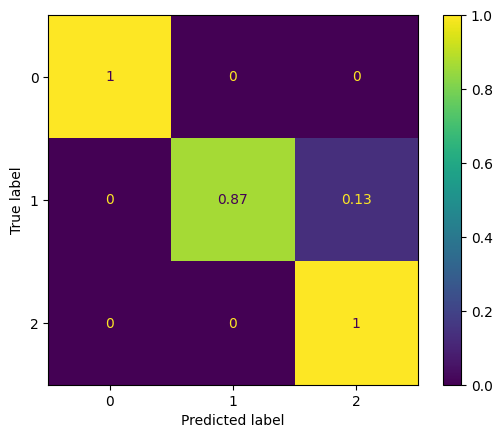

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix
final_estimator = DecisionTreeClassifier(criterion = best_parameters.get("criterion"),max_depth=best_parameters.get("max_depth"),random_state=random_state)
final_estimator.fit(X_train,y_train)
y_pred = final_estimator.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on the test set is ",np.round(accuracy,4)*100,"%")
confusion_matrix(y_test,y_pred,normalize="true")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(final_estimator,X_test,y_test,normalize="true")
print(disp)

The accuracy on the test set is  94.59 %


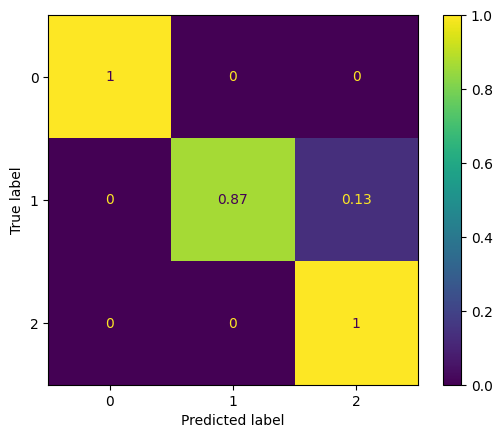

In [97]:
# lo provo a fare con la gridSearchCV
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=random_state)
parameters = {"criterion":criterions,"max_depth":range(1,max_depth+1)}
dt_grid_searccv = GridSearchCV(dt,param_grid=parameters,scoring="accuracy")
dt_grid_searccv.fit(X_train,y_train)
dt_best = dt_grid_searccv.best_estimator_

y_pred = dt_best.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on the test set is ",np.round(accuracy,4)*100,"%")
confusion_matrix(y_test,y_pred,normalize="true")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(final_estimator,X_test,y_test,normalize="true")
print(disp)

In [98]:
from sklearn.ensemble import RandomForestClassifier
grid = ParameterGrid({'max_depth':list(range(1,8)),'n_estimators':list(range(10,100,10))})
scores = []
for i in grid:
    estimator = RandomForestClassifier(n_estimators=i.get("n_estimators"),max_depth=i.get("max_depth"),random_state=random_state)
    scores.append(np.mean(cross_val_score(estimator,X_train,y_train,scoring = "accuracy",cv = 2)))
best_parameters = list(grid)[np.argmax(scores)]


The accuracy on the test set is  94.59 %


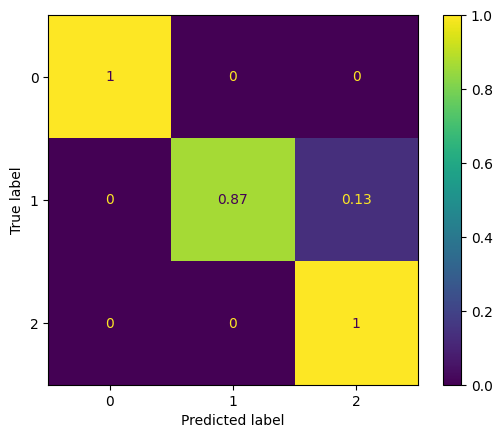

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix
final_estimator = RandomForestClassifier(n_estimators=best_parameters.get("n_estimators"),max_depth=best_parameters.get("max_depth"),random_state=random_state)
final_estimator.fit(X_train,y_train)
y_pred = final_estimator.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on the test set is ",np.round(accuracy,4)*100,"%")
confusion_matrix(y_test,y_pred,normalize="true")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(final_estimator,X_test,y_test,normalize="true");
print(disp);

The accuracy on the test set is  94.59 %


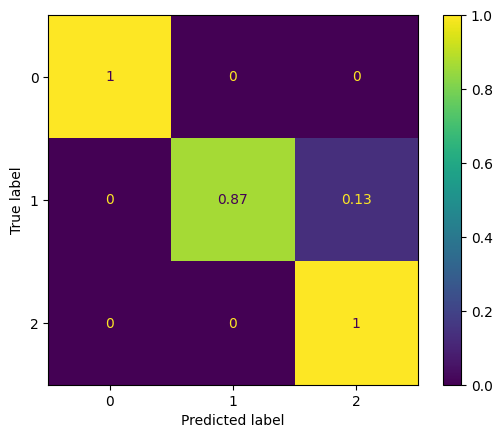

In [100]:
# lo provo a fare con la gridSearchCV
from sklearn.model_selection import GridSearchCV
dt = RandomForestClassifier(random_state=random_state)
parameters = {'max_depth':list(range(1,8)),'n_estimators':list(range(10,100,10))}
dt_grid_searccv = GridSearchCV(dt,param_grid=parameters,scoring="accuracy")
dt_grid_searccv.fit(X_train,y_train)
dt_best = dt_grid_searccv.best_estimator_

y_pred = dt_best.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on the test set is ",np.round(accuracy,4)*100,"%")
confusion_matrix(y_test,y_pred,normalize="true")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(final_estimator,X_test,y_test,normalize="true")
print(disp)

The accuracy on the test set is  89.19 %


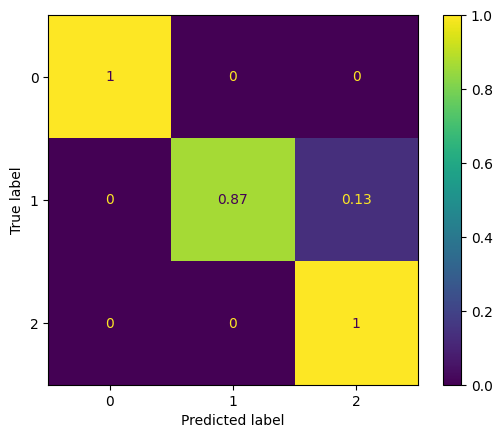

In [105]:
#direttamente con grid search cv
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
parametes ={"n_neighbors":list(range(1,10))}
knc_grid_cv = GridSearchCV(knc,param_grid=parametes,scoring="accuracy")
knc_grid_cv.fit(X_train,y_train)
knc_best = knc_grid_cv.best_estimator_

y_pred = knc_best.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy on the test set is ",np.round(accuracy,4)*100,"%")
confusion_matrix(y_test,y_pred,normalize="true")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(final_estimator,X_test,y_test,normalize="true")
print(disp)